In [1]:
#importing libraries
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#Reading dataset
df= pd.read_excel(r"sales_data.xlsx")
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


Data Cleaning

In [3]:
#Checking for duplicates
print(df.shape)
df1=df['CustomerID'].drop_duplicates()
print(df1.shape)

(5000, 40)
(5000,)


Thus no duplicates in the data

In [4]:
#Checking for NULL
df.isnull().sum(axis=0)

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

This shows that there are no null values in the data. 

In [5]:
#Checking for negative values
df['TOTAL_ORDERS'].min()

1

This shows that number of orders are not negative or zero

EXPLORATORY DATA ANALYSIS

In [6]:
# Average orders,revenue and expenses
print("Average number of orders per customer = {}".format(round(df['TOTAL_ORDERS'].mean(),0)))
print("Average revenue per customer = {}".format(round(df['REVENUE'].mean(),0)))
print("Average carriage revenue per customer = {}".format(round(df['CARRIAGE_REVENUE'].mean(),0)))
print("Average shipping cost per customer = {}".format(round(df['AVERAGESHIPPING'].mean(),0)))

Average number of orders per customer = 13.0
Average revenue per customer = 1682.0
Average carriage revenue per customer = 46.0
Average shipping cost per customer = 4.0


DAILY ANALYSIS

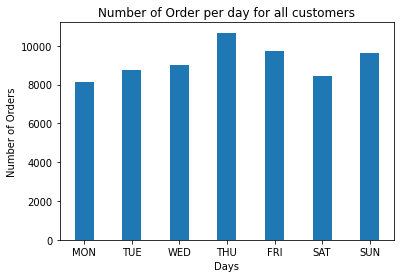

In [7]:
#plotting number of orders per day for all customers
i1=['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']
i=['MON','TUE','WED','THU','FRI','SAT','SUN']
total_orders= [x for x in df[i1].sum()]
plt.bar(i,total_orders,width=0.4)
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.title("Number of Order per day for all customers")
plt.show()

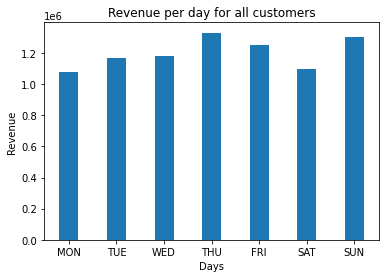

In [8]:
#plotting revenue per day for all customers
i2=['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']
i=['MON','TUE','WED','THU','FRI','SAT','SUN']
total_revenue= [x for x in df[i2].sum()]
plt.bar(i,total_revenue,width=0.4)
plt.xlabel("Days")
plt.ylabel("Revenue")
plt.title("Revenue per day for all customers")
plt.show()

In [9]:
#printing revenue per order for each day
for a in range(0,7):
    print("Revenue per order on {} = {}".format(i[a],total_revenue[a]/total_orders[a]))

Revenue per order on MON = 132.1107034990792
Revenue per order on TUE = 133.09988030095758
Revenue per order on WED = 131.08414571746388
Revenue per order on THU = 124.62502155576382
Revenue per order on FRI = 128.7537529544754
Revenue per order on SAT = 130.4752881074017
Revenue per order on SUN = 135.52681520722967


WEEKLY ANALYSIS

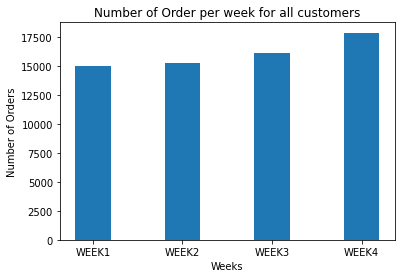

In [10]:
#plotting number of orders per week for all customers
i1=['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']
i=['WEEK1','WEEK2','WEEK3','WEEK4']
total_orders= [x for x in df[i1].sum()]
plt.bar(i,total_orders,width=0.4)
plt.xlabel("Weeks")
plt.ylabel("Number of Orders")
plt.title("Number of Order per week for all customers")
plt.show()

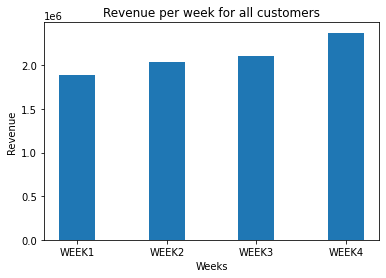

In [11]:
#plotting revenue per week for all customers
i2=['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']
i=['WEEK1','WEEK2','WEEK3','WEEK4']
total_revenue= [x for x in df[i2].sum()]
plt.bar(i,total_revenue,width=0.4)
plt.xlabel("Weeks")
plt.ylabel("Revenue")
plt.title("Revenue per week for all customers")
plt.show()

In [12]:
#printing revenue per order for every week
for a in range(0,4):
    print("Revenue per order in {} = {}".format(i[a],total_revenue[a]/total_orders[a]))

Revenue per order in WEEK1 = 126.30540596437388
Revenue per order in WEEK2 = 132.76161888591392
Revenue per order in WEEK3 = 130.59656594427244
Revenue per order in WEEK4 = 132.53152290502794


HOURLY ANALYSIS

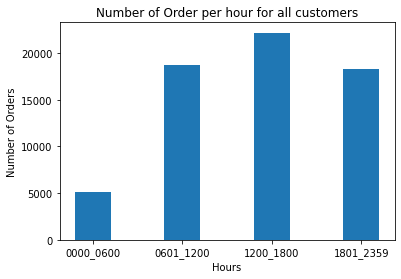

In [13]:
#plotting number of orders per hour for all customers
i1=['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']
i=['0000_0600','0601_1200','1200_1800','1801_2359']
total_orders= [x for x in df[i1].sum()]
plt.bar(i,total_orders,width=0.4)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.title("Number of Order per hour for all customers")
plt.show()

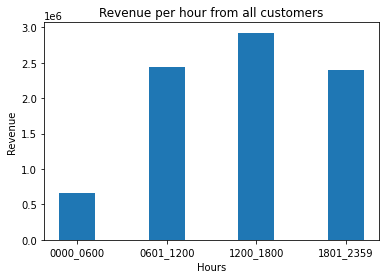

In [14]:
#plotting revenue per hour for all customers
i2=['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']
i=['0000_0600','0601_1200','1200_1800','1801_2359']
total_revenue= [x for x in df[i2].sum()]
plt.bar(i,total_revenue,width=0.4)
plt.xlabel("Hours")
plt.ylabel("Revenue")
plt.title("Revenue per hour from all customers")
plt.show()

In [15]:
#printing revenue per order for every hour period
for a in range(0,4):
    print("Revenue per order in {} = {}".format(i[a],total_revenue[a]/total_orders[a]))

Revenue per order in 0000_0600 = 127.39369751166406
Revenue per order in 0601_1200 = 129.96205968714963
Revenue per order in 1200_1800 = 131.87452097428957
Revenue per order in 1801_2359 = 130.7875976402469


RFM MODELLING

In [16]:
# Recency is nothing but the days since last order
df['Recency']=df['DAYSSINCELASTORDER']
# Frequency is the number of orders the customer has placed with the company
df['Frequency']=df['TOTAL_ORDERS']
#Monetary is the total amount of money spent by the customer in the company
df['Monetary']=df['REVENUE']
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Recency,Frequency,Monetary
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,61,37,14,1067.92,5674.65,3916.53,1327.44,1,124,11986.54
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,13,24,44,30.25,3143.69,2205.47,5646.55,1,82,11025.96
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,6,12,25,0.00,707.98,2560.91,3990.80,1,43,7259.69
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,10,13,21,0.00,1908.99,2025.05,3058.23,1,44,6992.27
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,9,27,13,501.34,1197.83,3004.77,1559.50,1,55,6263.44


Narrowing down RFM for each customer

In [17]:
df2=df[['CustomerID','Recency','Frequency','Monetary']]
df2.head()

,CustomerID,Recency,Frequency,Monetary
0,22,1,124,11986.54
1,29,1,82,11025.96
2,83,1,43,7259.69
3,95,1,44,6992.27
4,124,1,55,6263.44


In [18]:
# We cut recency, frequency and monetary into 3 parts 
# labels for recency start from 3 as lower the recency indicates more customer participation and thus a higher score
df2['Recency_score']= pd.qcut(df2['Recency'],3,labels=[3,2,1],duplicates='drop')

# labels for frequency and monetary start from 1 as lower frequency and money spent results in a lower score
df2['Frequency_score'] = pd.qcut(df2['Frequency'],3,labels=[1,2,3])

df2['Monetary_score'] = pd.qcut(df2['Monetary'],3,labels=[1,2,3])

df2['RFM_score'] = (df2['Recency_score'].astype(str)+df2['Frequency_score'].astype(str) +df2['Monetary_score'].astype(str))
df2

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score
0,22,1,124,11986.54,3,3,3,333
1,29,1,82,11025.96,3,3,3,333
2,83,1,43,7259.69,3,3,3,333
3,95,1,44,6992.27,3,3,3,333
4,124,1,55,6263.44,3,3,3,333
...,...,...,...,...,...,...,...,...
4995,173946,207,1,117.49,1,1,1,111
4996,173987,207,1,117.49,1,1,1,111
4997,174004,207,1,117.49,1,1,1,111
4998,174038,207,1,117.49,1,1,1,111


In [19]:
# Function to cluster all the customer groups on the basis of RFM_score
def rfm_level(df):
    #Loyal Customers, who are the champions of all the customers with highest score of RFM. 
    if (df['RFM_score']=='333') :
        return 'Champions'
    
    #Customers who have the most potential to become the Champions. 
    #They recently buy the products and they make their purchases quite frequently but not expensive products 
    elif ((df['RFM_score'] in {'332','331','323','313'})):
        return 'Loyalists'

    #Customers whose frequency score and monetary score are slightly lower as they are newer customers who have recently shopped here
    elif ((df['RFM_score'] in {'321','322','311','312'})):
        return 'Potential Customers'

    #Customers who used to pay a lot of money and come to the store frequently but they did not purchase recently. 
    elif ((df['RFM_score']=='233')):
        return "Can't Lose"

    #Customers who do not come to store often and not frequently make purchases.
    elif ((df['RFM_score'] in {'223','213','212','231','232','211','221','222'})):
        return 'At Risk'
    
    #Customers who haven't paid a visit to the store for a long time. However, once in a while, they do spend lot of money
    elif ((df['RFM_score'] in {'132','123','113','133'})):
        return 'About to sleep'
    
    #Customers who the company have almost lost
    elif ((df['RFM_score'] in {'111','112','121','122','131'})):
        return 'Needs Attention'
    else:
        return 'Invalid RFM'

In [20]:
df2['Customer Segment'] = df2.apply(rfm_level, axis=1)
df2.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Customer Segment
0,22,1,124,11986.54,3,3,3,333,Champions
1,29,1,82,11025.96,3,3,3,333,Champions
2,83,1,43,7259.69,3,3,3,333,Champions
3,95,1,44,6992.27,3,3,3,333,Champions
4,124,1,55,6263.44,3,3,3,333,Champions


In [21]:
# FUnction to add complay action plan for each customer group
def rfm_action(df):
    #Loyal Customers, who are the champions of all the customers with highest score of RFM. 
    if (df['RFM_score']=='333') :
        return 'Offer Limited edition and Loyality programs'
    
    #Customers who have the most potential to become the Champions. 
    #They recently buy the products and they make their purchases quite frequently but not expensive products 
    elif ((df['RFM_score'] in {'332','331','323','313'})):
        return 'Upsell most expensive items'

    #Customers whose frequency score and monetary score are slightly lower as they are newer customers who have recently shopped here
    elif ((df['RFM_score'] in {'321','322','311','312'})):
        return 'Attract with additional benefits and premium products'

    #Customers who used to pay a lot of money and come to the store frequently but they did not purchase recently. 
    elif ((df['RFM_score']=='233')):
        return "Revive their interest by offering small offers and discounts"

    #Customers who do not come to store often and not frequently make purchases.
    elif ((df['RFM_score'] in {'223','213','212','231','232','211','221','222'})):
        return 'Provide limited time offers'
    
    #Customers who haven't paid a visit to the store for a long time. However, once in a while, they do spend lot of money
    elif ((df['RFM_score'] in {'132','123','113','133'})):
        return 'Price incentives and Limited time offer'
    
    #Customers who the company have almost lost
    elif ((df['RFM_score'] in {'111','112','121','122','131'})):
        return 'Higher price incentives'
    else:
        return 'Invalid RFM'

In [22]:
df2['Customer Action'] = df2.apply(rfm_action, axis=1)
df2.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Customer Segment,Customer Action
0,22,1,124,11986.54,3,3,3,333,Champions,Offer Limited edition and Loyality programs
1,29,1,82,11025.96,3,3,3,333,Champions,Offer Limited edition and Loyality programs
2,83,1,43,7259.69,3,3,3,333,Champions,Offer Limited edition and Loyality programs
3,95,1,44,6992.27,3,3,3,333,Champions,Offer Limited edition and Loyality programs
4,124,1,55,6263.44,3,3,3,333,Champions,Offer Limited edition and Loyality programs


In [23]:
# To gain insights, we observe the average customer of all the above groups
df2[['Recency','Frequency','Monetary','Customer Segment']].groupby(df2["Customer Segment"]).agg(['mean','count'])

C:\Users\Angad Bajwa\AppData\Local\Temp\ipykernel_804\960148443.py:2: FutureWarning: ['Customer Segment'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df2[['Recency','Frequency','Monetary','Customer Segment']].groupby(df2["Customer Segment"]).agg(['mean','count'])


Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Customer Segment                                                         
About to sleep       162.031949   313  21.616613   313  3443.260192   313
At Risk               73.692777   983  11.387589   983  1463.982391   983
Can't Lose            64.179562   685  28.883212   685  3918.333416   685
Champions              8.685000   400  30.517500   400  3929.934025   400
Loyalists              8.335227   176  17.863636   176  2349.248239   176
Needs Attention      195.624441  1342   4.093890  1342   424.643607  1342
Potential Customers    2.281562  1101   5.233424  1101   591.655459  1101

In [24]:
# Getting the champions, potential_customers and customers who need attention
df_champions=df2[df2['Customer Segment']=="Champions"]
df_champions.to_excel("Champions.xlsx",index=False)
df_pc=df2[df2['Customer Segment']=='Potential Customers']
df_pc.to_excel("Potential_Customers.xlsx",index=False)
df_attention=df2[df2['Customer Segment']=='Needs Attention']
df_attention.to_excel("Need_attention.xlsx",index=False)

In [25]:
#Champions
df_champions.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Customer Segment,Customer Action
0,22,1,124,11986.54,3,3,3,333,Champions,Offer Limited edition and Loyality programs
1,29,1,82,11025.96,3,3,3,333,Champions,Offer Limited edition and Loyality programs
2,83,1,43,7259.69,3,3,3,333,Champions,Offer Limited edition and Loyality programs
3,95,1,44,6992.27,3,3,3,333,Champions,Offer Limited edition and Loyality programs
4,124,1,55,6263.44,3,3,3,333,Champions,Offer Limited edition and Loyality programs


In [26]:
#Potential customers
df_pc.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Customer Segment,Customer Action
64,3280,1,13,1886.04,3,2,2,322,Potential Customers,Attract with additional benefits and premium p...
65,3313,1,12,1879.72,3,2,2,322,Potential Customers,Attract with additional benefits and premium p...
68,3414,1,10,1858.95,3,2,2,322,Potential Customers,Attract with additional benefits and premium p...
69,3421,1,17,1857.86,3,2,2,322,Potential Customers,Attract with additional benefits and premium p...
70,3608,1,13,1813.31,3,2,2,322,Potential Customers,Attract with additional benefits and premium p...


In [27]:
#Customers who need attention
df_attention.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_score,Customer Segment,Customer Action
3351,6187,128,8,1429.55,1,2,2,122,Needs Attention,Higher price incentives
3353,24722,128,8,691.26,1,2,2,122,Needs Attention,Higher price incentives
3354,40771,128,3,496.18,1,1,2,112,Needs Attention,Higher price incentives
3355,48454,128,6,437.86,1,2,2,122,Needs Attention,Higher price incentives
3356,50817,128,6,421.26,1,2,1,121,Needs Attention,Higher price incentives


Thank you!
- ANGAD RIPUDAMAN SINGH BAJWA